In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [241]:
img = cv2.imread('BFF_ST_000_APT_000_20190513133132.tif')

In [251]:
#cv2.imwrite('template.png', img[470:490, 226:246])

In [242]:
template = cv2.imread('template.png')

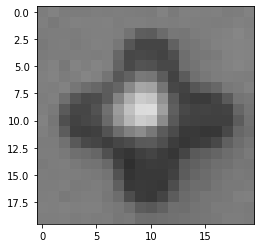

In [243]:
plt.imshow(template)

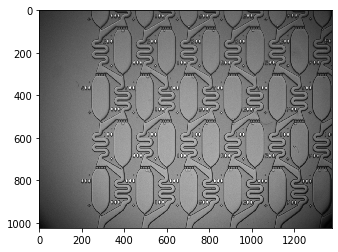

In [244]:
plt.imshow(img)

In [245]:
def nms(dets, thresh):  
    x1 = dets[:, 0]  
    y1 = dets[:, 1]  
    x2 = dets[:, 2]  
    y2 = dets[:, 3]  
    scores = dets[:, 4]
    areas = (x2 - x1 + 1) * (y2 - y1 + 1)  
    order = scores.argsort()[::-1]  
    keep = []  
    while order.size > 0:  
        i = order[0]  
        keep.append(i)  
        xx1 = np.maximum(x1[i], x1[order[1:]])  
        yy1 = np.maximum(y1[i], y1[order[1:]])  
        xx2 = np.minimum(x2[i], x2[order[1:]])  
        yy2 = np.minimum(y2[i], y2[order[1:]])  
        w = np.maximum(0.0, xx2 - xx1 + 1)  
        h = np.maximum(0.0, yy2 - yy1 + 1)  
        inter = w * h  
        ovr = inter / (areas[i] + areas[order[1:]] - inter)  
        inds = np.where(ovr <= thresh)[0]  
        order = order[inds + 1]  
    return dets[keep]

In [246]:
def loc_to_dets(loc, m, w, h):
    dets = []
    for pt in zip(*loc[::-1]):
        x1, y1 = pt
        x2, y2 = pt[0] + w, pt[1] + h
        score = m[y1, x1]
        dets.append([x1,y1,x2,y2,score])
    return np.array(dets)

In [249]:
def show_matching(img, template, thres=0.9):
    m = cv2.matchTemplate(img, template, cv2.TM_CCORR_NORMED)
    loc = np.where(m>thres)
    img_ = img.copy()
    h, w = template.shape[:2]
    dets = loc_to_dets(loc, m, w, h)
    dets = nms(dets, 0.5)
    print("Find "+str(len(dets))+" markers!")
    #for pt in zip(*loc[::-1]):
    for det in dets:
        cv2.rectangle(img_, (int(det[0]), int(det[1])), (int(det[2]), int(det[3])), (0,255,255), 2)
    plt.figure(figsize=(15,15))
    plt.imshow(img_)

Find 27 markers!


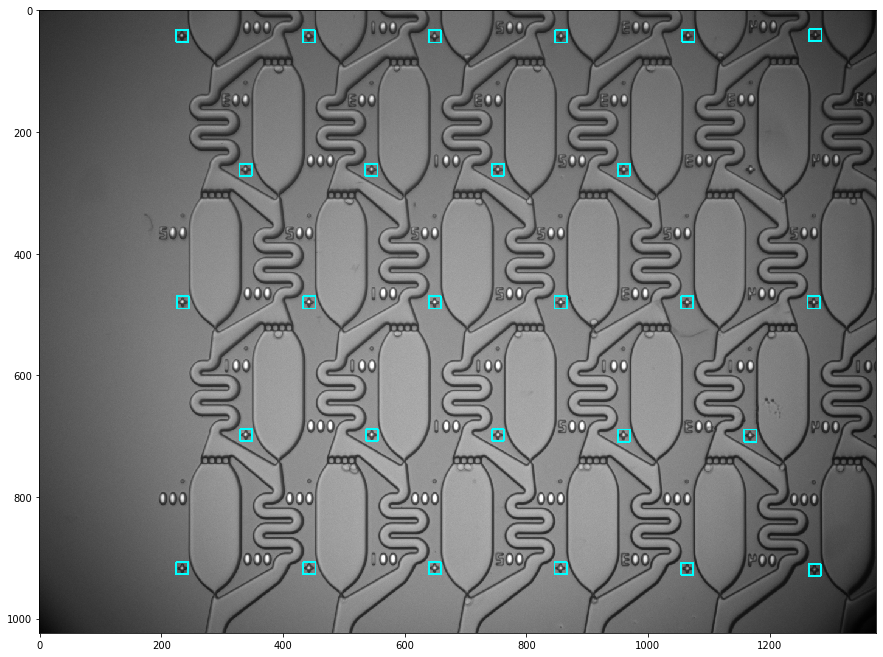

In [250]:
show_matching(img, template_new)